In [21]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
# Loading the dataset
data = pd.read_csv('logistic_regression.csv')

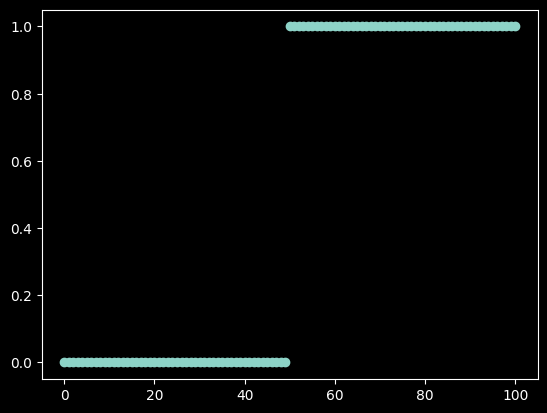

In [23]:
# Plotting the data
X = np.array(data.x)
Y = np.array(data.y)
plt.scatter(X, Y)
plt.show()


In [24]:
'''
Defining the sigmoid function
given by: 1/(1+e^(-z))
'''
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [25]:
'''
Computing the gradient for logistic regression
given by: (1/m) * X.T * (h - y)
where h (hypothesis function) = sigmoid(X * theta)
'''

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1 / m) * X.T @ (h - y)


In [34]:
'''Performing gradient descent to optimize theta
   learning rate is the step size for each iteration, decided beforehand by trial and error
   number of iterations for gradient descent is also decided beforehand by trial and error
   X_b = Adding bias term to feature matrix X
   Update rule for each i in iteration:
    gradient = (1/m) * X_b.T * ((1/(1+e^(X_b * theta))) - y)
    theta = theta - learning_rate * gradient
   '''

def gradient_descent(X, y, lr=0.01, iterations=500000):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1])

    for i in range(iterations):
        grad = compute_gradient(X_b, y, theta)
        theta -= lr * grad
        if(i % 500 == 0):
            print("Theta values after", i, "iterations of Gradient Descent: theta0 =", theta[0], ", theta1 =", theta[1])

    return theta


In [35]:
def predict(X, theta, threshold=0.5):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    probs = sigmoid(X_b @ theta)
    return (probs >= threshold).astype(int)


In [36]:
'''Finding optimal theta using gradient descent and making predictions'''

theta = gradient_descent(X, Y)
preds = predict(X, theta)

Theta values after 0 iterations of Gradient Descent: theta0 = 4.950495049504954e-05 , theta1 = 0.12871287128712877
Theta values after 500 iterations of Gradient Descent: theta0 = -1.0950573649485609 , theta1 = 0.2995441936514991
Theta values after 1000 iterations of Gradient Descent: theta0 = -1.9325477507565392 , theta1 = 0.1609741176939573
Theta values after 1500 iterations of Gradient Descent: theta0 = -2.6031678914974963 , theta1 = 0.030983017314790272
Theta values after 2000 iterations of Gradient Descent: theta0 = -3.1545651313231997 , theta1 = 0.15402576945051438
Theta values after 2500 iterations of Gradient Descent: theta0 = -3.538555369123175 , theta1 = 0.0779912908844059
Theta values after 3000 iterations of Gradient Descent: theta0 = -3.8682236064204583 , theta1 = 0.16168120566659738
Theta values after 3500 iterations of Gradient Descent: theta0 = -4.172193324258195 , theta1 = 0.15104908271930523
Theta values after 4000 iterations of Gradient Descent: theta0 = -4.4454792526

In [29]:
'''Checking the Accuracy of the model'''

accuracy = np.mean(preds == Y)
print('Theta:', theta)
print('Accuracy:', accuracy * 100, '%')

#We get 100% accuracy because the data is linearly separable, otherwise accuracy may vary, but generally an accuracy of  95% is a very accurate fit for this regression model.

Theta: [-22.89255342   0.46393246]
Accuracy: 100.0 %


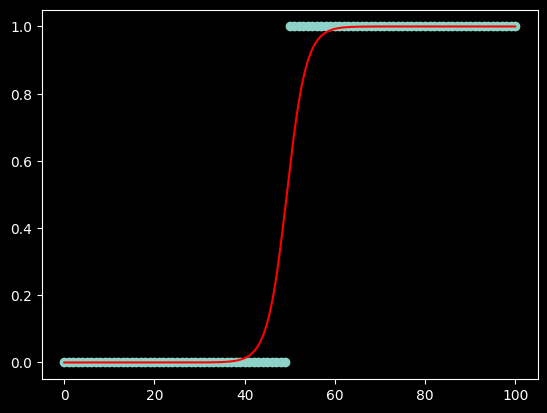

In [30]:

'''Plotting the logistic regression curve and data points, to check fit and visualise our accuracy'''
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_b = np.c_[np.ones((x_vals.shape[0], 1)), x_vals]
y_vals = sigmoid(X_b @ theta)

plt.scatter(X, Y)
plt.plot(x_vals, y_vals, color='red')
plt.show()
